In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [3]:
data = pd.read_csv('energyConsumption.csv')
data

,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector,Energy Consumption Balancing Item,Primary Energy Consumption Total
0,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096,3.693,7226.265
1,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458,2.654,6594.709
2,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159,-0.934,6524.198
3,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152,-1.627,5944.336
4,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631,-2.817,6074.551
5,385.648,933.663,227.897,687.473,1942.080,2641.221,1540.532,1543.553,1709.752,-0.592,5805.318
6,326.179,981.183,197.526,693.949,1999.819,2691.487,1583.965,1587.202,1846.331,0.678,5954.498
7,338.036,1018.978,206.942,706.301,2111.198,2817.613,1646.394,1649.550,1889.873,1.923,6194.365
8,361.672,956.550,210.244,651.041,2035.699,2661.997,1502.988,1505.857,1664.842,0.603,5776.048
9,461.932,991.668,266.381,693.462,2232.462,2911.515,1577.804,1580.742,1638.807,0.068,6177.455


In [4]:
data = data.values

In [5]:
newColumn = np.ones((data.shape[0],1))
data = np.append(newColumn,data, axis = 1)
print(data.shape)

(545, 12)


In [6]:
X = np.zeros([545,11])
X[:, 0] = data[:, 0]
X[:, 1] = data[:, 1]
X[:, 2] = data[:, 3]
X[:, 3] = data[:, 4]
X[:, 4] = data[:, 5]
X[:, 5] = data[:, 6]
X[:, 6] = data[:, 7]
X[:, 7] = data[:, 8]
X[:, 8] = data[:, 9]
X[:, 9] = data[:, 10]
X[:, 10] = data[:,11]
y = np.zeros([data.shape[0],1])
y[:,0] = data[:, 2]
thetas = np.zeros([1,X.shape[1]])
print(X.shape)
print(y.shape)

(545, 11)
(545, 1)


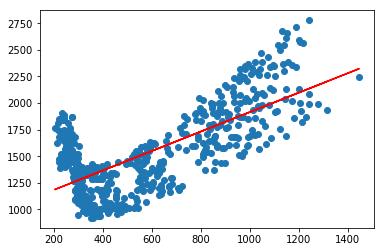

In [14]:
#Visualization using only 1 parameters and the output
#Scikit learn
X_axis = X[:, 1][:,np.newaxis]
model = LinearRegression()
model.fit(X_axis,y)
pred = model.predict(X_axis)
plt.scatter(X_axis,y)
plt.plot(X_axis,pred, color = 'red')

In [8]:
#Cost Function
def calcVectorizedCost(X, y, theta): 
    n = y.shape[0]
    diff = (np.dot(X,theta.T)-y)
    cost = 1/(2*n) * np.sum(diff**2)
    return cost

In [9]:
calcVectorizedCost(X,y,thetas)

1258088.6956064815

In [10]:
#Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    n = y.shape[0]
    for i in range (iters):
        A = np.dot(X,theta.T)
        theta = theta - alpha*(1/n)*np.dot(X.T, A - y).T
    cost = calcVectorizedCost(X, y, theta)
    return theta, cost

Cost:   nan
Theta:  [[nan nan nan nan nan nan nan nan nan nan nan]]


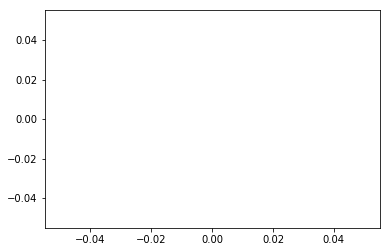

In [11]:
#Iterations
iterations = 1500
x_axis = list()
y_axis = list()
for i in range (100,iterations,100):
    theta, cost = gradientDescent(X,y,thetas,0.1,i)
    x_axis.append(i)
    y_axis.append(cost)
print("Cost:  ", cost)
print("Theta: ",theta)
plt.plot(x_axis,y_axis, color = 'blue')